# ChatGoogleGenerativeAI

This docs will help you get started with Google AI [chat models](/docs/concepts/chat_models). For detailed documentation of all ChatGoogleGenerativeAI features and configurations head to the [API reference](https://python.langchain.com/api_reference/google_genai/chat_models/langchain_google_genai.chat_models.ChatGoogleGenerativeAI.html).

Google AI offers a number of different chat models. For information on the latest models, their features, context windows, etc. head to the [Google AI docs](https://ai.google.dev/gemini-api/docs/models/gemini).

:::info Google AI vs Google Cloud Vertex AI

Google's Gemini models are accessible through Google AI and through Google Cloud Vertex AI. Using Google AI just requires a Google account and an API key. Using Google Cloud Vertex AI requires a Google Cloud account (with term agreements and billing) but offers enterprise features like customer encription key, virtual private cloud, and more.

To learn more about the key features of the two APIs see the [Google docs](https://cloud.google.com/vertex-ai/generative-ai/docs/migrate/migrate-google-ai#google-ai).

:::

## Overview
### Integration details

| Class | Package | Local | Serializable | [JS support](https://js.langchain.com/docs/integrations/chat/google_generativeai) | Package downloads | Package latest |
| :--- | :--- | :---: | :---: |  :---: | :---: | :---: |
| [ChatGoogleGenerativeAI](https://python.langchain.com/api_reference/google_genai/chat_models/langchain_google_genai.chat_models.ChatGoogleGenerativeAI.html) | [langchain-google-genai](https://python.langchain.com/api_reference/google_genai/index.html) | ❌ | beta | ✅ | ![PyPI - Downloads](https://img.shields.io/pypi/dm/langchain-google-genai?style=flat-square&label=%20) | ![PyPI - Version](https://img.shields.io/pypi/v/langchain-google-genai?style=flat-square&label=%20) |

### Model features
| [Tool calling](/docs/how_to/tool_calling) | [Structured output](/docs/how_to/structured_output/) | JSON mode | [Image input](/docs/how_to/multimodal_inputs/) | Audio input | Video input | [Token-level streaming](/docs/how_to/chat_streaming/) | Native async | [Token usage](/docs/how_to/chat_token_usage_tracking/) | [Logprobs](/docs/how_to/logprobs/) |
| :---: | :---: | :---: | :---: |  :---: | :---: | :---: | :---: | :---: | :---: |
| ✅ | ✅ | ❌ | ✅ | ✅ | ✅ | ✅ | ✅ | ✅ | ❌ |

## Setup

To access Google AI models you'll need to create a Google Acount account, get a Google AI API key, and install the `langchain-google-genai` integration package.

### Credentials

Head to https://ai.google.dev/gemini-api/docs/api-key to generate a Google AI API key. Once you've done this set the GOOGLE_API_KEY environment variable:

In [1]:
import os
from google.colab import userdata

os.environ["GOOGLE_API_KEY"] = userdata.get('GOOGLE_API_KEY')

If you want to get automated tracing of your model calls you can also set your [LangSmith](https://docs.smith.langchain.com/) API key by uncommenting below:

In [ ]:
# os.environ["LANGSMITH_API_KEY"] = getpass.getpass("Enter your LangSmith API key: ")
# os.environ["LANGSMITH_TRACING"] = "true"

### Installation

The LangChain Google AI integration lives in the `langchain-google-genai` package:

In [2]:
%pip install -qU langchain-google-genai

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.3/41.3 kB 1.6 MB/s eta 0:00:00


## Instantiation

Now we can instantiate our model object and generate chat completions:

In [3]:
from langchain_google_genai import ChatGoogleGenerativeAI

llm = ChatGoogleGenerativeAI(
    model="gemini-1.5-pro",
    temperature=0,
    max_tokens=None,
    timeout=None,
    max_retries=2,
    # other params...
)

## Invocation

## Chaining

We can [chain](/docs/how_to/sequence/) our model with a prompt template like so:

## Safety Settings

Gemini models have default safety settings that can be overridden. If you are receiving lots of "Safety Warnings" from your models, you can try tweaking the `safety_settings` attribute of the model. For example, to turn off safety blocking for dangerous content, you can construct your LLM as follows:

For an enumeration of the categories and thresholds available, see Google's [safety setting types](https://ai.google.dev/api/python/google/generativeai/types/SafetySettingDict).

## API reference

For detailed documentation of all ChatGoogleGenerativeAI features and configurations head to the API reference: https://python.langchain.com/api_reference/google_genai/chat_models/langchain_google_genai.chat_models.ChatGoogleGenerativeAI.html

In [4]:
%%capture --no-stderr
%pip install -U langgraph

In [5]:
%%capture --no-stderr
%pip install -U tavily-python langchain_community

In [6]:
os.environ["TAVILY_API_KEY"] = userdata.get('TAVILY_API_KEY')

In [7]:
from langchain_community.tools.tavily_search import TavilySearchResults

tool = TavilySearchResults(max_results=2)
tools = [tool]
tool.invoke("What's a 'node' in LangGraph?")

[{'url': 'https://medium.com/@cplog/introduction-to-langgraph-a-beginners-guide-14f9be027141',
  'content': 'Nodes: Nodes are the building blocks of your LangGraph. Each node represents a function or a computation step. You define nodes to perform specific tasks, such as processing input, making'},
 {'url': 'https://www.datacamp.com/tutorial/langgraph-tutorial',
  'content': "In LangGraph, each node represents an LLM agent, and the edges are the communication channels between these agents. This structure allows for clear and manageable workflows, where each agent performs specific tasks and passes information to other agents as needed. State management. One of LangGraph's standout features is its automatic state"}]

In [9]:
from typing import Annotated

from langchain_community.tools.tavily_search import TavilySearchResults
from langchain_core.messages import BaseMessage
from typing_extensions import TypedDict

from langgraph.checkpoint.memory import MemorySaver
from langgraph.graph import StateGraph
from langgraph.graph.message import add_messages
from langgraph.prebuilt import ToolNode, tools_condition


class State(TypedDict):
    messages: Annotated[list, add_messages]


graph_builder = StateGraph(State)


tool = TavilySearchResults(max_results=2)
tools = [tool]
llm_with_tools = llm.bind_tools(tools)


def chatbot(state: State):
    return {"messages": [llm_with_tools.invoke(state["messages"])]}


graph_builder.add_node("chatbot", chatbot)

tool_node = ToolNode(tools=[tool])
graph_builder.add_node("tools", tool_node)

graph_builder.add_conditional_edges(
    "chatbot",
    tools_condition,
)
graph_builder.add_edge("tools", "chatbot")
graph_builder.set_entry_point("chatbot")

memory = MemorySaver()
graph = graph_builder.compile(
    checkpointer=memory,
    # This is new!
    interrupt_before=["tools"],
    # Note: can also interrupt __after__ actions, if desired.
    # interrupt_after=["tools"]
)

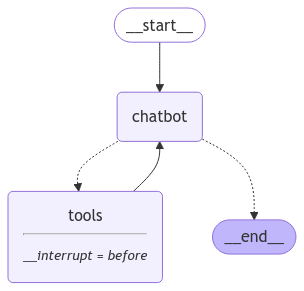

In [10]:
from IPython.display import Image, display

try:
    display(Image(graph.get_graph().draw_mermaid_png()))
except Exception:
    # This requires some extra dependencies and is optional
    pass

In [52]:
def stream_graph_updates(user_input: str):
    for event in graph.stream({"messages": [("user", user_input)]}):
        for value in event.values():
            print("Assistant:", value["messages"][-1].content)


while True:
    try:
        user_input = input("User: ")
        if user_input.lower() in ["quit", "exit", "q"]:
            print("Goodbye!")
            break

        stream_graph_updates(user_input)
    except:
        # fallback if input() is not available
        user_input = "What do you know about LangGraph?"
        print("User: " + user_input)
        stream_graph_updates(user_input)
        break

User: What do you know about LangGraph?
Assistant: 
Assistant: [{"url": "https://www.langchain.com/langgraph", "content": "LangGraph is a framework for building and scaling agentic applications with LangChain Platform. It supports diverse control flows, human-agent collaboration, streaming, and deployment options for complex tasks."}, {"url": "https://www.datacamp.com/tutorial/langgraph-tutorial", "content": "LangGraph is a library within the LangChain ecosystem that simplifies the development of complex, multi-agent large language model (LLM) applications. Learn how to use LangGraph to create stateful, flexible, and scalable systems with nodes, edges, and state management."}]
Assistant: LangGraph is a framework for building and scaling agentic applications with LangChain Platform. It supports diverse control flows, human-agent collaboration, streaming, and deployment options for complex tasks.  It simplifies the development of complex, multi-agent large language model (LLM) applicatio

In [1]:
! pip install -U phidata
! pip install lancedb tantivy pypdf sqlalchemy
import os
from google.colab import userdata

os.environ["GOOGLE_API_KEY"] = userdata.get('GOOGLE_API_KEY')

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 670.2/670.2 kB 18.2 MB/s eta 0:00:00
INFO: pip is looking at multiple versions of lancedb to determine which version is compatible with other requirements. This could take a while.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 29.9/29.9 MB 42.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 33.5/33.5 MB 17.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 63.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 298.0/298.0 kB 20.3 MB/s eta 0:00:00


In [2]:
from phi.agent import Agent
from phi.model.google import Gemini
from phi.embedder.google import GeminiEmbedder
from phi.knowledge.pdf import PDFUrlKnowledgeBase
from phi.vectordb.lancedb import LanceDb, SearchType

embeddings = GeminiEmbedder().get_embedding("The quick brown fox jumps over the lazy dog.")

# Create a knowledge base from a PDF
knowledge_base = PDFUrlKnowledgeBase(
    urls=["https://phi-public.s3.amazonaws.com/recipes/ThaiRecipes.pdf"],
    # Use LanceDB as the vector database
    vector_db=LanceDb(
        table_name="recipes",
        uri="tmp/lancedb",
        search_type=SearchType.vector,
        embedder=GeminiEmbedder(),
    ),
)
# Comment out after first run as the knowledge base is loaded
knowledge_base.load()

agent = Agent(
    model=Gemini(id="gemini-1.5-flash"),
    show_tool_calls=True,
    markdown=True,
)
agent.print_response("How do I make chicken and galangal in coconut milk soup", stream=True)


PydanticUserError: `GeminiEmbedder` is not fully defined; you should define `model_types`, then call `GeminiEmbedder.model_rebuild()`.

For further information visit https://errors.pydantic.dev/2.10/u/class-not-fully-defined